In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets import interact,widgets
import numpy as np
import matplotlib.pylab as plt
import celluloid as cell  #animations
import pandas as pd
import os
from scipy.interpolate import CubicSpline

path=os.getcwd()
#sns.set_theme()
#matplotlib.rc('xtick', labels
# ize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
import seaborn as sns
import os
path=os.getcwd()



def fourierT(f):

    return (np.fft.fftshift(np.fft.ifft(np.fft.fftshift(f))))


def fourierI(f):

    return (np.fft.fftshift(np.fft.fft(np.fft.fftshift(f))))



In [2]:
def fourier_splitC(A01,A02,gamma,beta2,beta3,V,lenght,k):

    c = 299792458
   
    dz = 0.001

    A1=A01*k

    A2=A02*k

    UD1=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)

    UD2=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)
    
    zz=0

    while zz<=lenght:

        A1a=fourierI(UD1*fourierT(A1))

        A2a=fourierI(UD1*fourierT(A2))

        N1=1j*gamma*(np.abs(A1a)**2+2*np.abs(A2a)**2)

        A1aa=np.exp(dz*N1)*A1a

        N2=1j*gamma*(np.abs(A2a)**2+2*np.abs(A1aa)**2)

        A2aa=np.exp(dz*N2)*A2a

        A1=fourierI(UD1*fourierT(A1aa))

        A2=fourierI(UD2*fourierT(A2aa))

        zz+=dz
        
    return fourierT(A1),fourierT(A2)


def Delta_landa1(y_data,x_data):

    
    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),len(x_data)*3)
    Y=cs(new_xdata)
    medium_value=np.max(Y)*0.01
    M_V=[]
    wl_s=[]
    pow_s=[]
    
    for i in range(len(Y)):
        if Y[i]>medium_value:
            
            M_V.append(i)
            wl_s.append(new_xdata[i])
            pow_s.append(Y[i])
            

    x1=new_xdata[np.min(M_V)]; 
    x2=new_xdata[np.max(M_V)]
    return abs(x2-x1)


    
def cubic(x_data,y_data,N):

    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),N)
    Y=cs(new_xdata)

    return new_xdata, Y


C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


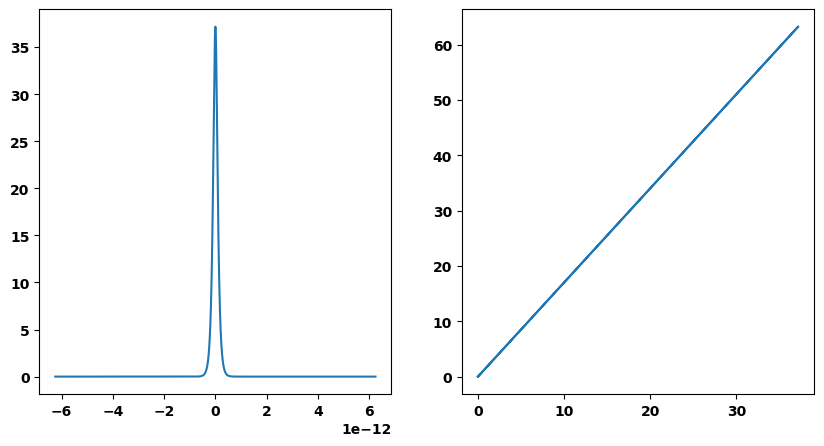

In [3]:
#Constants
c = 299792458;            
n = 2**13    # number of grid points
TimeWindow = 12.5e-12 # width of time window [s]     
dT = TimeWindow/n
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid
WaveLength=1550e-9      #reference wavelength [m]
w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
nu = 100e6 #Repetition rate (Hz)
t0 = 200e-15       # duration of input [s]
power = 80e-3/(nu*t0)        #peak power of input [W]
delta = np.pi*2.3
A1 = np.sqrt(power)*1/np.cosh(TimeGrid/(t0/2.634))*np.exp(1j*delta) # input field [W^(1/2)]
A2 = np.sqrt(power)*1/np.cosh(TimeGrid/(t0/2.634)) # input field [W^(1/2)]


f=plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(TimeGrid,A1)

plt.subplot(122)
plt.plot(A1,A2)

In [4]:
def anim2(a,k):

    delta = np.pi*k
    p = np.sqrt(power)
    A1 = a*p*1/np.cosh(TimeGrid/(t0/2.634))*np.exp(1j*delta) # input field [W^(1/2)]
    A2 = (1-a)*p*1/np.cosh(TimeGrid/(t0/2.634)) # input field [W^(1/2)]
     # frequency grid

    f=plt.figure(figsize=(15,5))

    plt.subplot(121)
    plt.plot(TimeGrid,np.abs(A1+A2)**2)
    plt.ylabel('$|E|$')

    plt.subplot(122)
    plt.plot(A1,A2)
    plt.xlabel('$E_x$')
    plt.ylabel('$E_y$')
    plt.ylim(-70,70)
    plt.xlim(-70,70)

In [5]:
opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        a= widgets.FloatSlider(min=0,max=1,value=1,step=0.01,**opc),  
        k=widgets.FloatSlider(min=0,max=40,value=1,step=1,**opc),
       
        );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=1.0, readout_format…

# Propagación de pulso con polarización lineal.

In [6]:
V = 2*np.pi*np.arange(-n/2,n/2,1).T/(n*dT)  # frequency grid
W = V+w0
WL =(2*np.pi*c/W)  #Frequencies.

In [7]:
def anim2(a,k,C):

    p = np.sqrt(power)
    delta = np.pi*C
    pulse= a*p*1/np.cosh(TimeGrid/(t0/2.634))*np.exp(1j*delta) # input field [W^(1/2)]
    pulse2= (1-a)*p*1/np.cosh(TimeGrid/(t0/2.634)) #cc*np.exp(-(WL_in-(WL_central+l))**2/(2*p**2))*np.exp(1j*C2)
    WaveLength=1550e-9      #reference wavelength [m]
    c = 299792458
    length = 2.0             #ibre length [m]
    D=-1.0*1e-12*1e9*1e-3 #Dispersion
    dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
    #betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
    beta2=-WaveLength**2/(2*np.pi*c)*D
    beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
    A = pulse
    A2= pulse2
    gamma = 10.8*1e-3
    sol1,sol2=fourier_splitC(A,A2,gamma,beta2,beta3,V,length,k)
    sol=np.abs(sol1+sol2)**2

    
    
    #plt.plot(TimeGrid,A)

    f=plt.figure(figsize=(13,5))


    plt.subplot(121)

    plt.plot(WL*1e9,10*np.log10(sol/1e-3),label='Simulated spectrum')
    plt.plot(WL*1e9,10*np.log10(np.abs(fourierT((A+A2))**2/1e-3)),label='Simulated spectrum')
    #plt.xlim(1400,1700)
    plt.ylim(-100,20)
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$A.U$',fontsize=20)
    plt.legend()
    #print('Ld=',t0**2/abs(beta2))
    #print('Lnl=',1/(gamma*power))Initial
    print(Delta_landa1((sol),WL))

    plt.subplot(122)
    plt.plot(A,A2)
    plt.xlabel('$E_x$')
    plt.ylabel('$E_y$')
    plt.ylim(-70,70)
    plt.xlim(-70,70)


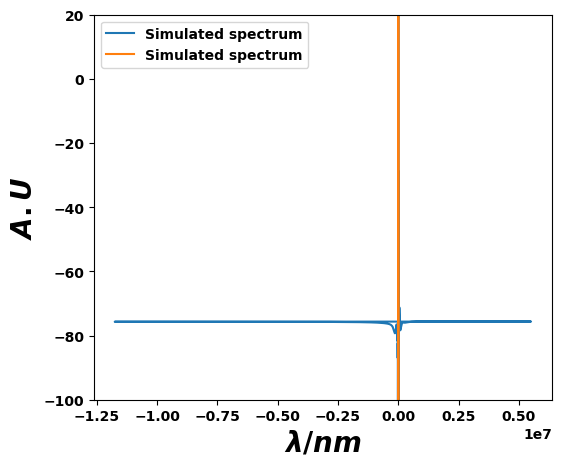

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=1.0, readout_format…

In [8]:
opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        a= widgets.FloatSlider(min=0,max=1,value=1,step=0.01,**opc),  
        k=widgets.FloatSlider(min=0,max=1,value=1,step=0.001,**opc),
        C=widgets.FloatSlider(min=0,max=1,value=1,step=1,**opc)
       
        );